In [8]:
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [9]:
##Train data preprocessing

In [11]:
train=pd.read_excel("C:/Users/prade/Desktop/project/capstone projects/FLIGHT FARE PREDITCION/Data_Train.xlsx")

In [12]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
train.shape

(10683, 11)

In [16]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [18]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [19]:
train.dropna(inplace=True)

In [20]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [21]:
train.duplicated().sum()

220

In [22]:
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [23]:
train.drop_duplicates(inplace=True)

In [24]:
train.shape

(10462, 11)

In [25]:
categorical=train.select_dtypes(include=['object']).columns

In [26]:
category=['Airline','Source','Destination','Additional_Info']

In [27]:
## unique values
for i in category:
  print(i)
  print('--'*30)
  print(train[i].unique())
  print('*'*30)

Airline
------------------------------------------------------------
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
******************************
Source
------------------------------------------------------------
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
******************************
Destination
------------------------------------------------------------
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
******************************
Additional_Info
------------------------------------------------------------
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
******************************


In [28]:
## value counts
for i in category:
  print(i)
  print('--'*30)
  print(train[i].value_counts())
  print('*'*30)

Airline
------------------------------------------------------------
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
******************************
Source
------------------------------------------------------------
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
******************************
Destination
------------------------------------------------------------
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad   

C:\Users\prade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prade\anaconda3\lib\si

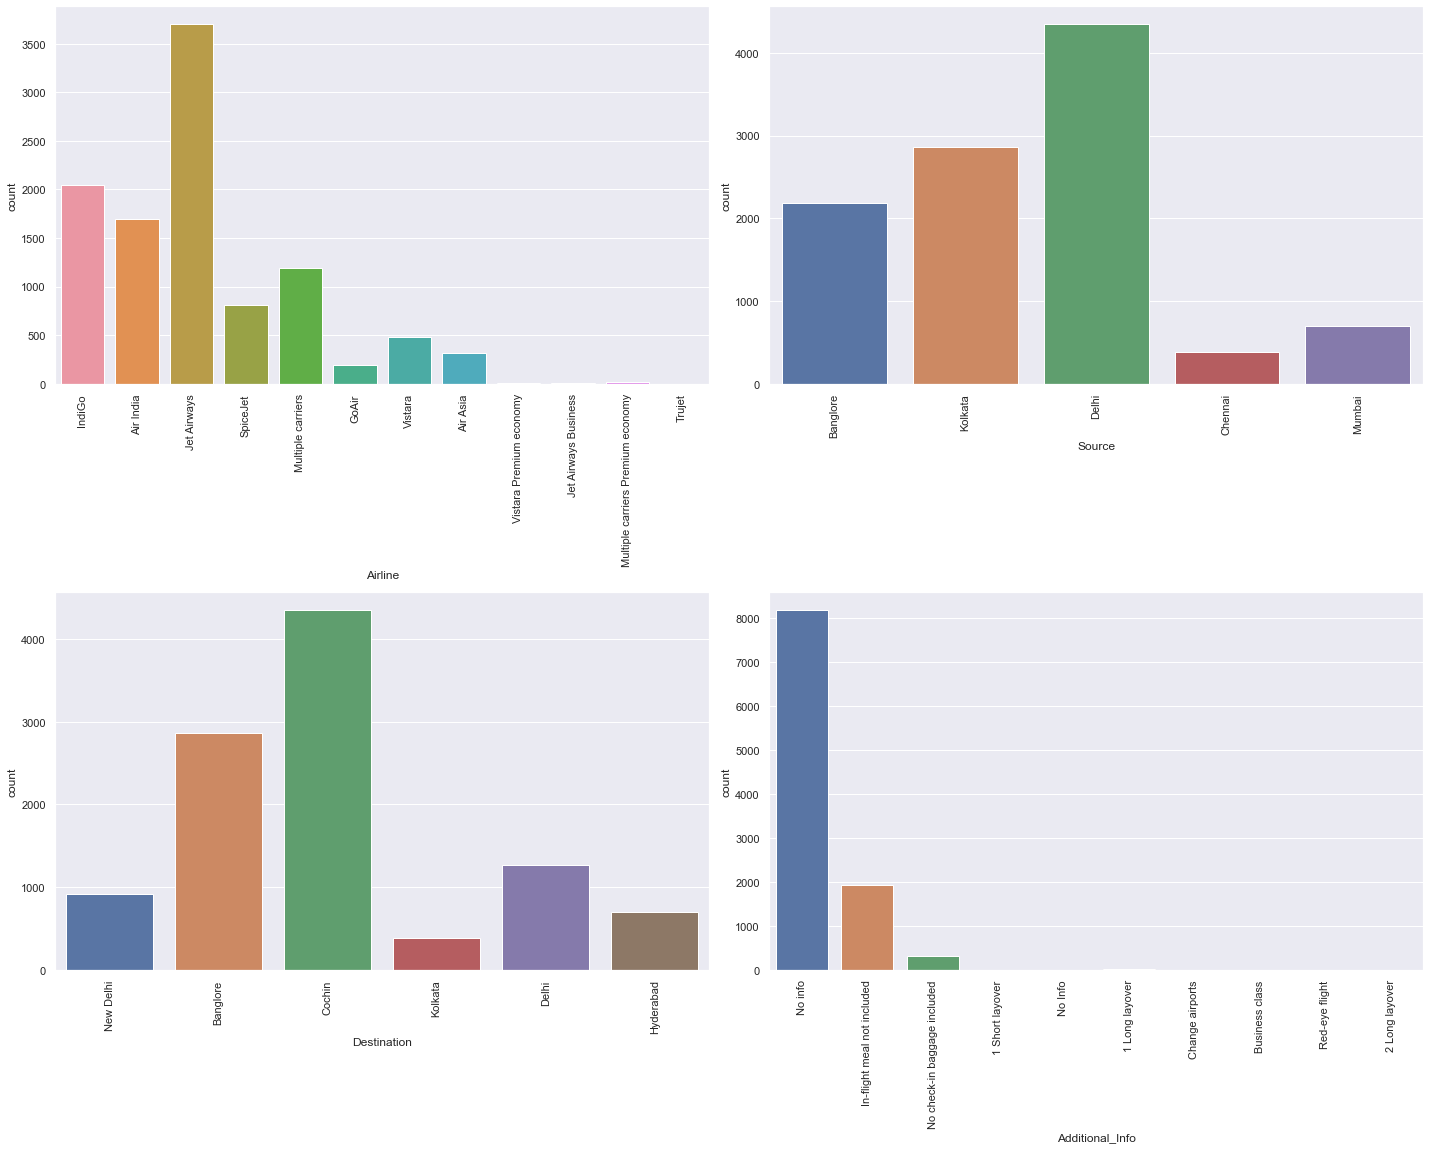

In [29]:
## checking value_counts of categorical data
c=1
plt.figure(figsize=(20,30))

for i in category:  
  plt.subplot(4,2,c)
  sns.countplot(train[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=1.0)
  c=c+1
plt.show()

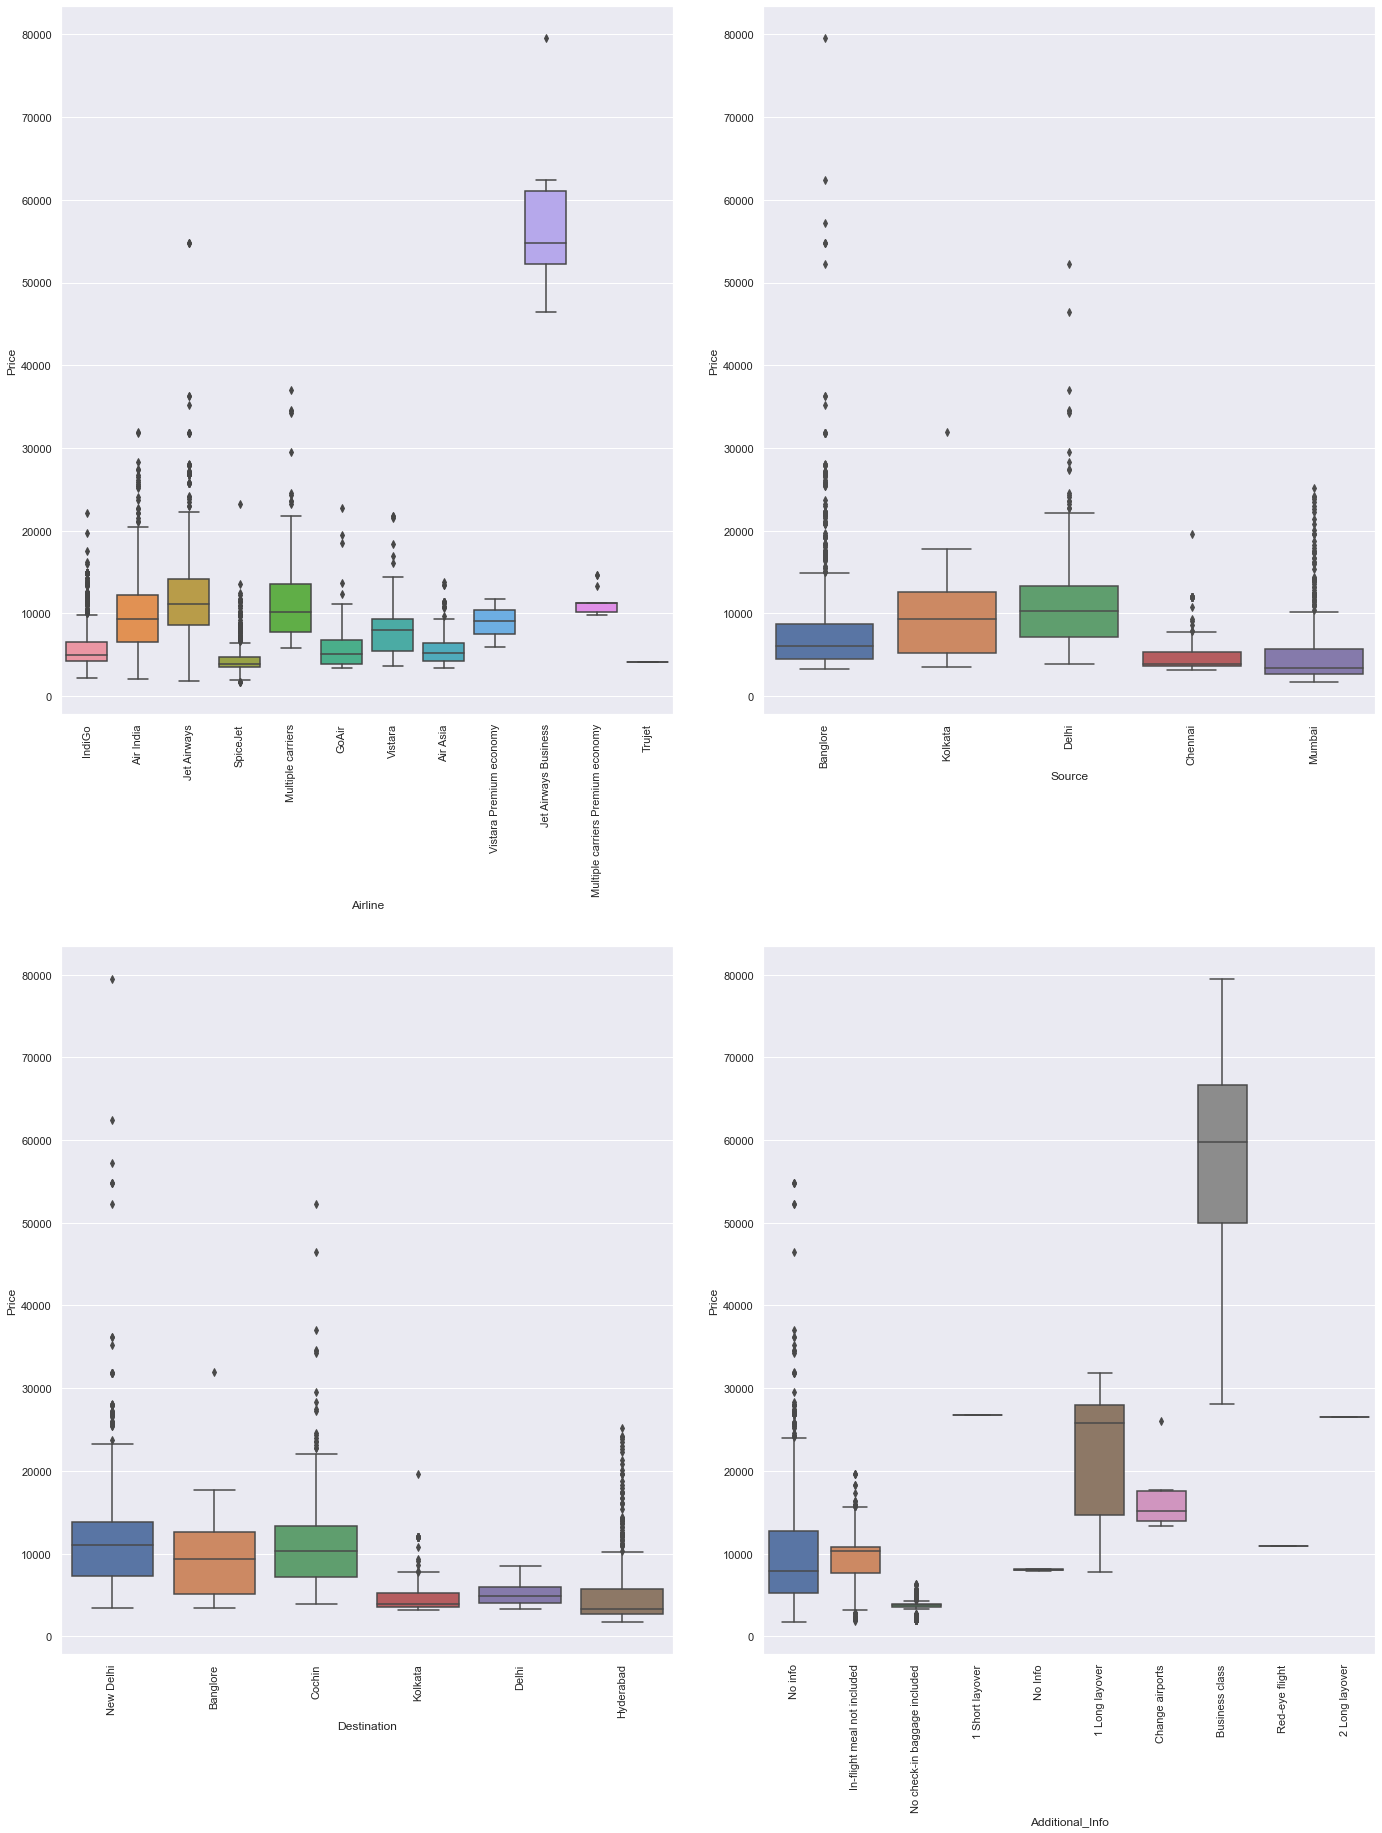

In [30]:
## checking for relation of prices with categorical data
c=1
plt.figure(figsize=(20,50))

for i in category:
  plt.subplot(4,2,c)
  sns.boxplot(x=train[i],y=train.Price)
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
plt.show()

In [31]:
train['Journey_day']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.day

In [32]:
train['Journey_month']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.month

In [33]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

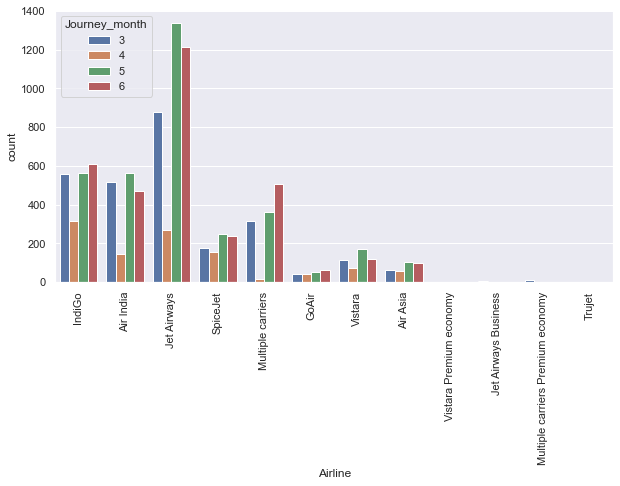

In [34]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='Airline',hue='Journey_month',data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [35]:
##since we have converted date_of_journey column into integer,Now we can drop as it of no use
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [36]:
## Departure time is when a plane leaves the gate
## similar to Date_of_Journey we can extract values from Dep_Time

## Extracting Hours
train['Dep_hour']=pd.to_datetime(train['Dep_Time']).dt.hour

## Extracting Minutes
train['Dep_min']=pd.to_datetime(train['Dep_Time']).dt.minute

## Now we can drop Dep_Time as it is of no use
train.drop(['Dep_Time'],axis=1,inplace=True)

In [37]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [38]:
# arrival time is when the plane pulls up to the gate
# similar to Date_of_Journey we can extract values from Arrival_Time

## Extracting Hours
train['Arrival_hour']=pd.to_datetime(train['Arrival_Time']).dt.hour

## Extracting Minutes
train['Arrival_min']=pd.to_datetime(train['Arrival_Time']).dt.minute

## Now we can drop Arrival_Time as it is of no use
train.drop(['Arrival_Time'],axis=1,inplace=True)

In [39]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [40]:
## Time taken by plane to reach destination is called Duration
# it is the difference between Departure Time and Arrival Time

# Assigning and converting Duration column into list
duration=list(train['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:  # check if duration contains only hour or mins
    if 'h' in duration[i]:
      duration[i]=duration[i].strip() +' 0m'   ## Adds 0 minute
    else:
      duration[i]='0h ' + duration[i]        ## Adds 0 hour

duration_hours =[]
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = 'h')[0]))              #Extract hours from duration
  duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))     #Extract only minutes from duration

In [41]:
## Adding duration_hours and duration_mins list to train_data dataframe
train['Duration_hours']=duration_hours
train['Duration_mins']=duration_mins

In [42]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [43]:
train.drop(['Duration'],axis=1,inplace=True)

In [44]:
train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [45]:
# As Airline is Nominal Categorical Data we will perform OneHotEncoding

Airline=train['Airline']

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
# As source is Nominal categorical data we will perform OneHotEncoding

source = train[['Source']]

source =pd.get_dummies(source,drop_first=True)

source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [47]:
Destination=train[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
## Additional _info contains almost 80% no_info
## Route and Total_stops are related to each other

train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [49]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


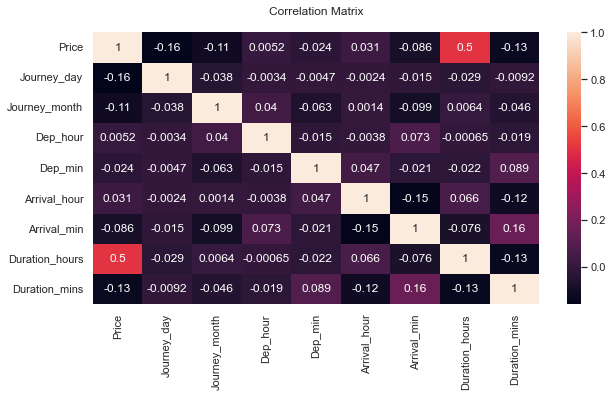

In [50]:
plt.figure(figsize=(10,5))
plt.title('Correlation Matrix\n')
sns.heatmap(train.corr(),annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_min'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>]], dtype=object)

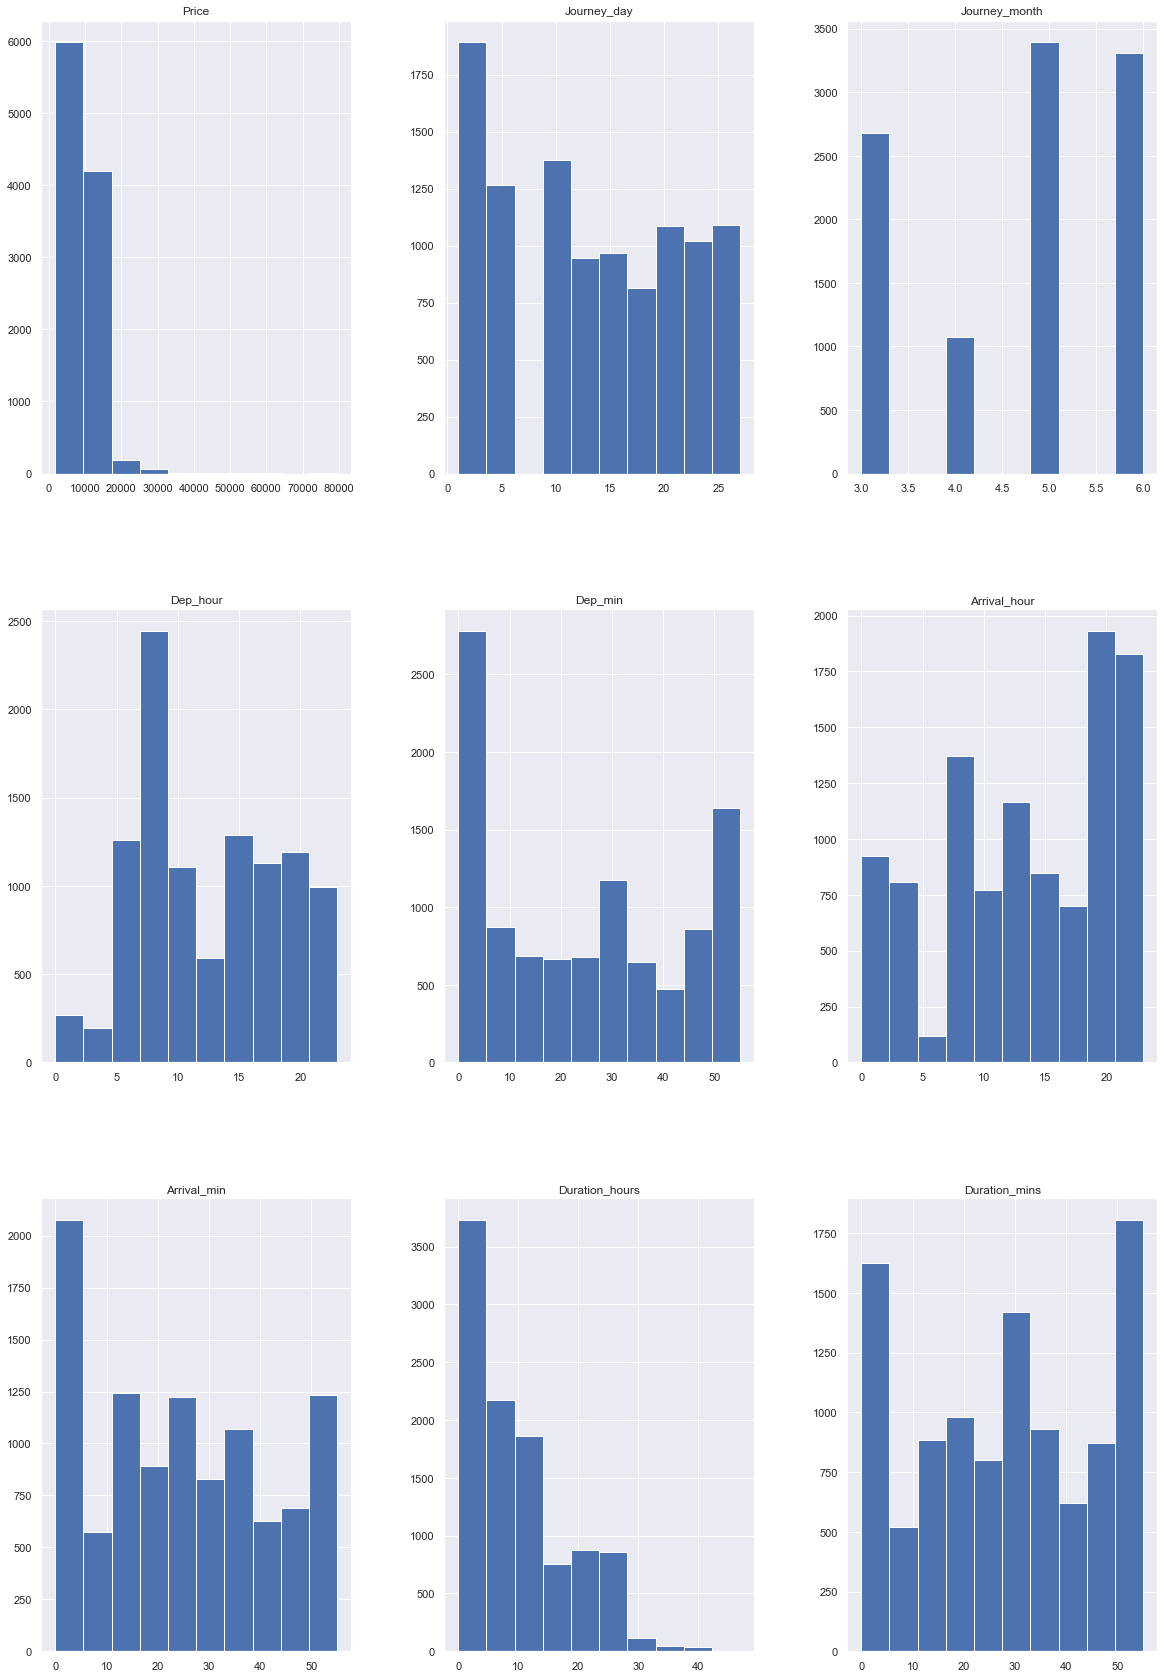

In [51]:
train.hist(figsize=(20,30)) #summary of distribution for relevant variables

In [52]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [53]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with corresponding keys

train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [54]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [55]:
# Concatenate dataframe --> train+airline+source+destination
train1= pd.concat([train,Airline,source,Destination],axis=1)

In [56]:
train1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [57]:
train1.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [58]:
train1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [59]:
train1.shape

(10462, 30)

In [60]:
## Test dataset preprocessing

In [72]:
test_data = pd.read_excel("C:/Users/prade/Desktop/project/capstone projects/FLIGHT FARE PREDITCION/Test_set.xlsx")

In [73]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [74]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [75]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
## importing Libraries for model building
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

## Now Lets do Training & Testing of our Dataset

In [77]:
x = train1.drop('Price', axis=1)      
y = train1['Price']   

In [78]:
x.shape,y.shape

((10462, 29), (10462,))

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

## ***Standarization of Dataset***

In [80]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

## **Now Lets first try with Decision Tree Regressor**

In [81]:
price_forest = DecisionTreeRegressor( min_samples_split= 2)
price_forest.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(price_forest.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(price_forest.score(x_test, y_test)))

Training set score: 0.9698
Test set score: 0.7104


## **Random Forest Without HyperParameter Tunning**

In [83]:
ran_forest = RandomForestRegressor(random_state=6)

In [84]:
ran_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=6)

In [85]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(ran_forest.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(ran_forest.score(x_test, y_test)))

Training set score: 0.9541
Test set score: 0.7952


## **Now lets try Random Forest with HyperParameter Tunning**

In [86]:
n_estimators = [5,20,50,100,90,115,130] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = range(2,20,1) # maximum number of levels allowed in each decision tree
min_samples_split = range(2,10,1)  # minimum sample number to split a node
min_samples_leaf = range(1,10,1) # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [88]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [89]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 20, 50, 100, 90,
                                                         115, 130]},
                   random_state=35, verbose=2)

In [90]:
print ('Random grid: ', random_grid, '\n')  
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 90, 115, 130], 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10), 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 16, 'bootstrap': True}  



In [91]:
rand_reg = RandomForestRegressor( max_depth = 16,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 100,random_state=6)

In [92]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=16, min_samples_split=5, random_state=6)

In [93]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rand_reg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rand_reg.score(x_test, y_test)))

Training set score: 0.9289
Test set score: 0.8112


## **Now as we can see , we have reduced some effect of OverFitting by using HyperParameter Tunning.**

In [94]:
predy_rf = rand_reg.predict(x_test)

In [95]:
from sklearn.metrics import r2_score

r_squared_rf = r2_score(y_test, predy_rf)

r_squared_rf

0.8111618562869154

In [96]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [97]:
rmse_rf = sqrt(mean_squared_error(y_test,predy_rf))      # It is for testing

rmse_rf

2063.437428923667

## **Now Lets train our Model by using XGBoost**

In [98]:
# fit model to training data

model = XGBRegressor()

model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [99]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9335
Test set score: 0.8590


## **Now we will do hyperparameter tuning for XGBoost**

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 
                'learning_rate': [0.01, 0.05, 0.1], 
                'n_estimators': [100, 200, 300, 400, 500], 
                'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}

In [102]:
xgmodel = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

In [103]:
xgmodel.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                     

In [104]:
# To  find the parameters giving maximum accuracy
xgmodel.best_params_

{'reg_lambda': 0.001,
 'n_estimators': 500,
 'max_depth': 5,
 'learning_rate': 0.1}

In [105]:
# Create new model using the same parameters

new_model = XGBRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 400, reg_lambda= 0.001)

new_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.001, ...)

In [106]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(new_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(new_model.score(x_test, y_test)))

Training set score: 0.8889
Test set score: 0.8494


In [107]:
predy = new_model.predict(x_test)

In [108]:
r_squared = r2_score(y_test, predy)

r_squared

0.8493527523853788

In [109]:
rmse = sqrt(mean_squared_error(y_test,predy))      # It is for testing
rmse

1843.007248723587

In [110]:
predicted_value=pd.DataFrame({'Actual price':y_test,'predicted price':predy})

In [111]:
predicted_value

,Actual price,predicted price
4668,11934,11415.595703
2506,6526,6798.748535
3385,4832,6912.105957
1985,9314,11877.354492
8690,6674,8927.830078
...,...,...
7535,13381,12840.376953
3236,12557,9973.258789
793,7398,7383.441406
6453,3838,3100.368896
